# 1. Regression

## 1.1. Load Data and Train Model

In [1]:
from sklearn.linear_model import LinearRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import mean_squared_error

dataset = load_dataset('us_crime')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['train']
test = dataset['test']

model = LinearRegression()
model.fit(train['X'], train['y'])

mean_squared_error(test['y'], model.predict(test['X']))

np.float64(0.01902558611293644)

In [2]:
from holisticai.explainability.metrics import regression_explainability_metrics
from holisticai.utils import RegressionProxy
from holisticai.utils.feature_importances import compute_permutation_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

proxy = RegressionProxy(predict=model.predict)

importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy)

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(train['X'], features=ranked_importances.feature_names, proxy=proxy)

conditional_importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy, conditional=True)

regression_explainability_metrics(importances, partial_dependencies, conditional_importances)

,value,reference
metric,,
Alpha Importance Score,0.148515,0.0
XAI Ease Score,1.000000,1.0
Position Parity,0.045885,1.0
Rank Alignment,0.748729,1.0
Spread Ratio,0.692673,0.0
Spread Divergence,0.332569,0.0


<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

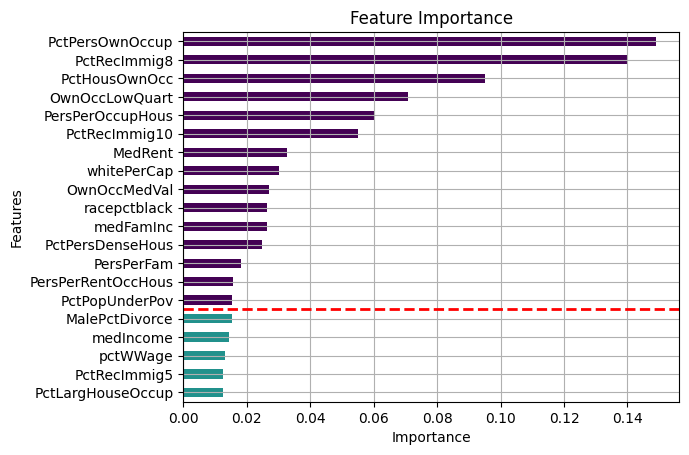

In [3]:
from holisticai.explainability.plots import plot_feature_importance

plot_feature_importance(importances)

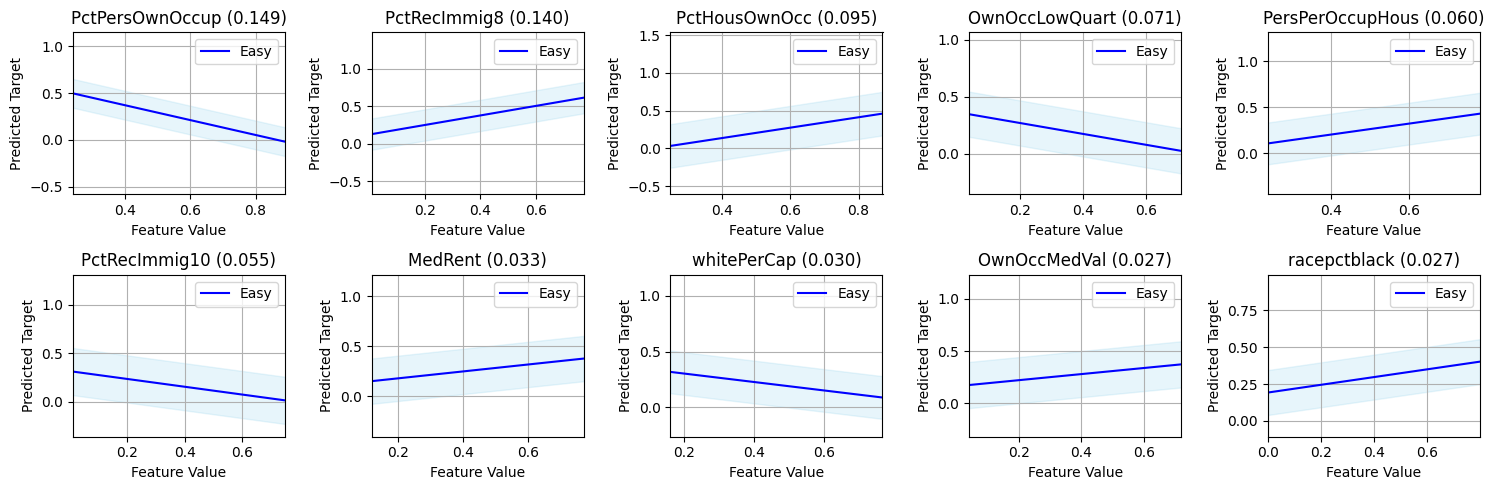

In [4]:
from holisticai.explainability.plots import plot_partial_dependence

plot_partial_dependence(partial_dependencies, ranked_importances, subplots=(2, 5), figsize=(15,5))

# 2. Classification

In [5]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset('adult')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LogisticRegression()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.7957987838584853

In [6]:
from holisticai.explainability.metrics import classification_explainability_metrics
from holisticai.utils import BinaryClassificationProxy
from holisticai.utils.feature_importances import compute_permutation_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

proxy = BinaryClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy)

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(train['X'], features=ranked_importances.feature_names, proxy=proxy)

conditional_importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy, conditional=True)

classification_explainability_metrics(importances, partial_dependencies, conditional_importances)

,value,reference
metric,,
Alpha Importance Score,0.010309,0.0
XAI Ease Score,0.750000,1.0
Position Parity,0.500000,1.0
Rank Alignment,0.500000,1.0
Spread Ratio,0.195386,0.0
Spread Divergence,0.076413,0.0


<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

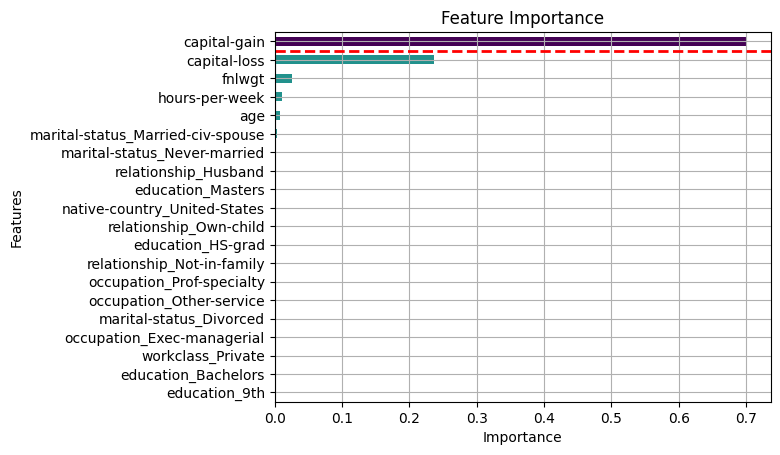

In [7]:
from holisticai.explainability.plots import plot_feature_importance

plot_feature_importance(importances)

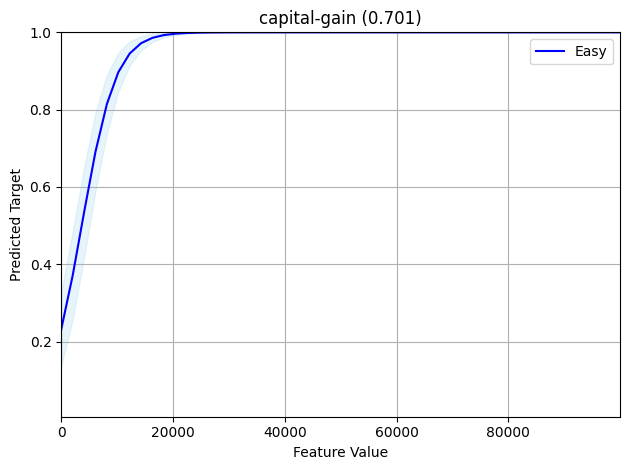

In [8]:
from holisticai.explainability.plots import plot_partial_dependence

plot_partial_dependence(partial_dependencies, ranked_importances, class_idx=1)

# 3. Multi Classification

In [9]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset(dataset_name="student_multiclass")
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LogisticRegression()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.810126582278481

In [10]:
from holisticai.explainability.metrics import multiclass_explainability_metrics
from holisticai.utils import MultiClassificationProxy
from holisticai.utils.feature_importances import compute_permutation_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

proxy = MultiClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy)

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(train['X'], features=ranked_importances.feature_names, proxy=proxy)

conditional_importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy, conditional=True)

multiclass_explainability_metrics(importances, partial_dependencies, conditional_importances)

,value,reference
metric,,
Alpha Importance Score,0.423077,0.0
XAI Ease Score,0.893939,1.0
Position Parity,0.091511,1.0
Rank Alignment,0.467605,1.0
Spread Ratio,0.887988,0.0
Spread Divergence,0.639405,0.0


<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

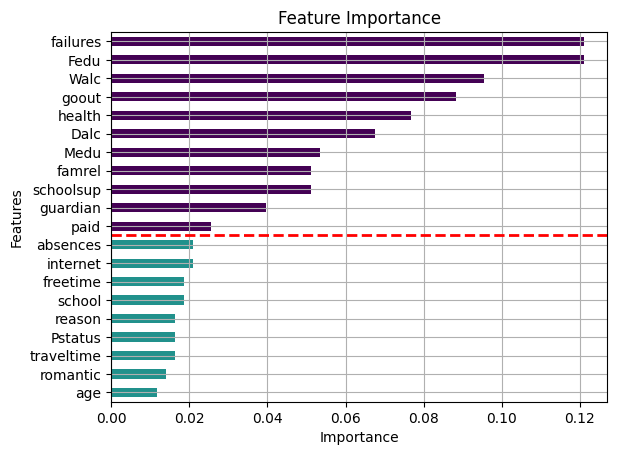

In [11]:
from holisticai.explainability.plots import plot_feature_importance

plot_feature_importance(importances)

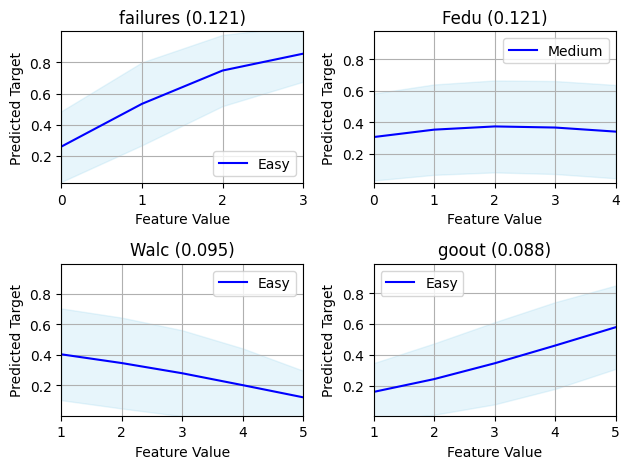

In [12]:
from holisticai.explainability.plots import plot_partial_dependence

plot_partial_dependence(partial_dependencies, ranked_importances, subplots=(2,2), class_idx=0)